# Feature selection I, selecting for feature information
> In this first out of two chapters on feature selection, you'll learn about the curse of dimensionality and how dimensionality reduction can help you overcome it. You'll be introduced to a number of techniques to detect and remove features that bring little added value to the dataset. Either because they have little variance, too many missing values, or because they are strongly correlated to other features.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 2 exercises "Dimensionality Reduction in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Train - test split

<div class=""><p>In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.  </p>
<p>You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.</p>
<p><code>ansur_df</code> has been pre-loaded for you.</p></div>

Instructions
<ul>
<li>Import the <code>train_test_split</code> function from <code>sklearn.model_selection</code>.</li>
<li>Assign the <code>'Gender'</code> column to y.</li>
<li>Remove the <code>'Gender'</code> column from the dataframe and assign the result to <code>X</code>.</li>
<li>Set the test size to 30% to perform a 70% train and 30% test data split.</li>
</ul>

In [21]:
ansur_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/ansur_df_1k.csv')

In [22]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

300 rows in test set vs. 700 in training set. 91 Features.


**You now have a split dataset to train and test the model on.**

### Fitting and testing the model


<p>In the previous exercise, you split the dataset into <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>. These datasets have been pre-loaded for you.
You'll now create a support vector machine classifier model (<code>SVC()</code>) and fit that to the training data.
You'll then calculate the accuracy on both the test and training set to detect overfitting.</p>

Instructions
<ul>
<li>Import <code>SVC</code> from <code>sklearn.svm</code> and <code>accuracy_score</code> from <code>sklearn.metrics</code></li>
<li>Create an instance of the Support Vector Classification class (<code>SVC()</code>).</li>
<li>Fit the model to the training data.</li>
<li>Calculate accuracy scores on both train and test data.</li>
</ul>

In [25]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC(gamma='auto')

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

49.0% accuracy on test set vs. 100.0% on training set


Well done! Looks like the model badly overfits on the training data. On unseen data it performs worse than a random selector would.

### Accuracy after dimensionality reduction

<div class=""><p>You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test vs. training data.</p>
<p>All relevant packages and <code>y</code> have been pre-loaded.</p></div>

Instructions
<ul>
<li>Select just the neck circumference (<code>'neckcircumferencebase'</code>) column from <code>ansur_df</code>.</li>
<li>Split the data, instantiate a classifier and fit the data. This has been done for you.</li>
<li>Once again calculate the accuracy scores on both training and test set.</li>
</ul>

In [27]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

94.3% accuracy on test set vs. 95.1% on training set


On the full dataset the model is rubbish but with a single feature we can make good predictions? This is an example of the curse of dimensionality! The model badly overfits when we feed it too many features. It overlooks that neck circumference by itself is pretty different for males and females.

### Finding a good variance threshold


<p>You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as <code>head_df</code>.</p>

In [28]:
head_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/head_df.csv')

Instructions 1/4
<li>Create a boxplot on <code>head_df</code>.</li>

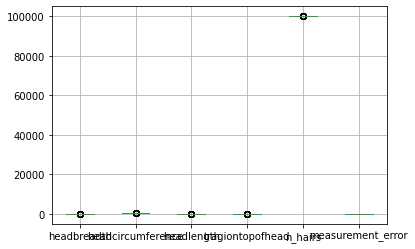

In [10]:
# Create the boxplot
head_df.boxplot()

plt.show()

Instructions 2/4

<li>Normalize the data by dividing the dataframe with its mean values.</li>

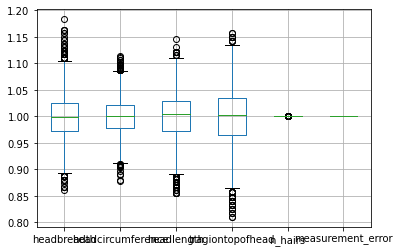

In [29]:
# Normalize the data
normalized_df = head_df/head_df.mean()

normalized_df.boxplot()
plt.show()

Instructions 3/4

<li>Print the variances of the normalized data.</li>

In [30]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              1.002552e-08
measurement_error    3.231707e-27
dtype: float64


Instructions 4/4

Question
Inspect the printed variances. If you want to remove the 2 very low variance features. What would be a good variance threshold?
Possible Answers

1.5e-03

1.5e-02

**1.0e-03**

1.0e-02

A threshold of 1.0e-03 (0.001) will remove the two low variance features.

### Features with low variance


<p>In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in <code>head_df</code> after normalization. Now use the <code>VarianceThreshold</code> feature selector to remove these features.</p>

Instructions
<ul>
<li>Create the variance threshold selector with a threshold of 0.001.</li>
<li>Normalize the <code>head_df</code> dataframe by dividing it by its mean values and fit the selector.</li>
<li>Create a boolean mask from the selector using <code>.get_support()</code>.</li>
<li>Create a reduced dataframe by passing the mask to the <code>.loc[]</code> method.</li>
</ul>

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 6 to 4.


**You've successfully removed the 2 low-variance features.**

### Removing features with many missing values

In [11]:
school_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/school_df.csv')

Instructions 1/2

Question

In what range lies highest ratio of missing values for a single feature in the dataset?

Possible Answers

**Between 0.9 and 1.0.**

Between 0.8 and 0.9.

Between 0.7 and 0.8.

Between 0.6 and 0.7.


In [ ]:
school_df.isna().sum() / len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

Instructions 1/2
<ul>
<li>Create a boolean mask on whether each feature has less than 50% missing values.</li>
<li>Apply the mask to <code>school_df</code> to select columns without many missing values.</li>
</ul>

In [ ]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


**The number of features went down from 21 to 19.**

### Correlation intuition

What statement on correlations is correct?

Possible Answers

**The correlation coefficient of A to B is equal to that of B to A.**

When two features have a correlation coefficient of 1 the values of both features are equal for each observation.

A correlation coefficient of 0 between two features A and B implies that high values of A are typically associated with low values of B.

**This is why you can drop half of the correlation matrix without losing information.**

### Inspecting the correlation matrix


In [12]:
ansur_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/ansur_df_6k_5c_preprocessed.csv')

<div class=""><p>A sample of the ANSUR body measurements dataset has been pre-loaded as <code>ansur_df</code>. Use the terminal to create a correlation matrix for this dataset.</p>
<p>What is the correlation coefficient between wrist and ankle circumference?</p></div>

In [ ]:
ansur_df.corr()

,Elbow rest height,Wrist circumference,Ankle circumference,Buttock height,Crotch height
Elbow rest height,1.000000,0.294753,0.301963,-0.007013,-0.026090
Wrist circumference,0.294753,1.000000,0.702178,0.576679,0.606582
Ankle circumference,0.301963,0.702178,1.000000,0.367548,0.386502
Buttock height,-0.007013,0.576679,0.367548,1.000000,0.929411
Crotch height,-0.026090,0.606582,0.386502,0.929411,1.000000


Possible Answers

**0.702178**

1.000000

0.301963

0.576679

**Quite a strong, positive correlation.**

### Visualizing the correlation matrix

<div class=""><p>Reading the correlation matrix of <code>ansur_df</code> in its raw, numeric format doesn't allow us to get a quick overview.
Let's improve this by removing redundant values and visualizing the matrix using seaborn.</p>
<p>Seaborn has been pre-loaded as <code>sns</code>, matplotlib.pyplot as <code>plt</code>, NumPy as <code>np</code> and pandas as <code>pd</code>.</p></div>

In [ ]:
import seaborn as sns

Instructions 1/4
<ul>
<li>Create the correlation matrix.</li>
<li>Visualize it using Seaborn's heatmap function.</li>
</ul>

In [ ]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

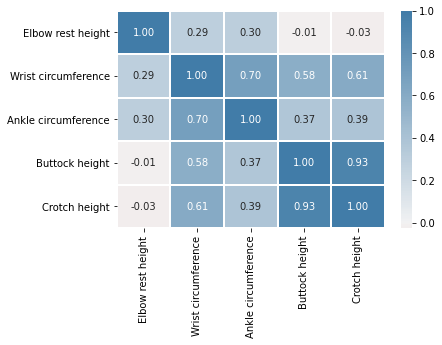

In [ ]:
# Create the correlation matrix
corr = ansur_df.corr()

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

Instructions 2/4
<li>Create a boolean mask for the upper triangle of the plot.</li>

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

Instructions 3/4
<li>Add the mask to the heatmap.</li>

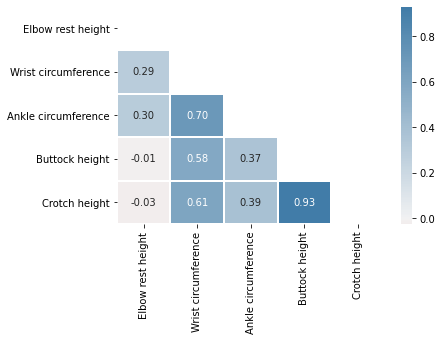

In [ ]:
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

Instructions 4/4

Question

Which two features have the strongest correlation?

Possible Answers

Wrist circumference and Ankle circumference.

Crotch height and Elbow rest height.

Wrist circumference and Buttock height.

**Buttock height and Crotch height.**

**The buttock and crotch height have a 0.93 correlation coefficient.**

### Filtering out highly correlated features


<div class=""><p>You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95. </p>
<p>Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.</p></div>

In [16]:
ansur_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/ansur_df_4k_99c_preprocessed.csv')

Instructions

<ul>
<li>Calculate the correlation matrix of <code>ansur_df</code> and take the absolute value of this matrix.</li>
<li>Create a boolean mask with <code>True</code> values in the upper right triangle and apply it to the correlation matrix.</li>
<li>Set the correlation coefficient threshold to <code>0.95</code>.</li>
<li>Drop all the columns listed in <code>to_drop</code> from the dataframe.</li>
</ul>

In [ ]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)


# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 88 columns.


**You've automated the removal of highly correlated features.**

### Nuclear energy and pool drownings


<div class=""><p>The dataset that has been pre-loaded for you as <code>weird_df</code> contains actual data provided by the US Centers for Disease Control &amp; Prevention and Department of Energy.</p>
<p>Let's see if we can find a pattern.</p>
<p>Seaborn has been pre-loaded as <code>sns</code> and matplotlib.pyplot as <code>plt</code>.</p></div>

In [18]:
weird_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/weird_df.csv')

Instructions 1/4
<li>Print the first five lines of <code>weird_df</code>.</li>

In [ ]:
# Print the first five lines of weird_df
print(weird_df.head(5))

   pool_drownings  nuclear_energy
0             421           728.3
1             465           753.9
2             494           768.8
3             538           780.1
4             430           763.7


Instructions 2/4
<li>Create a scatterplot with nuclear energy production on the x-axis and the number of pool drownings on the y-axis.</li>

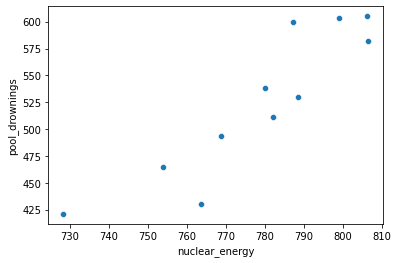

In [ ]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

Instructions 3/4
<li>Print out the correlation matrix of <code>weird_df</code>.</li>

In [ ]:
# Print out the correlation matrix of weird_df
print(weird_df.corr())

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000


Instructions 4/4

Question
What can you conclude from the strong correlation (r=0.9) between these features?
Possible Answers

If the nuclear energy production increases next year I'd better not go swimming.

You could bring the nuclear energy production down by increasing pool safety.

To build a Uranium usage forecaster, I should use pool drownings or nuclear energy production as features but not both.

**Not much, correlation does not imply causation.**

**While the example is silly, you'll be amazed how often people misunderstand correlation vs causation.**